In [1]:
import copy
from datetime import datetime
import json
import numpy as np
import os
from pathlib import Path
from typing import Any, Dict, List, Tuple, Union

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

import ase
import ase.io as ase_io
from ase import Atoms
from ase.visualize import view


In [2]:
os.chdir("C:/tmp/Molli") # set working directory to Molli top level

import ase_utils as au
import features as ft
import utils as ut
import xyz_parser
import molecule_analyzer as A
from target_molecule import TargetMolecule as tm

os.getcwd()

'C:\\tmp\\Molli'

In [3]:
colours = ["red","royalblue","limegreen","saddlebrown","orange","cyan","yellow","black","grey"]

In [4]:
mol_original = ase_io.read(filename=Path("C:/tmp/gaussian/workflow/data/conformers/original.xyz"))

In [5]:
mols_gfnff = au.create_ase_atoms_list_from_xyz_files(
                input_paths=ut.get_file_paths_in_dir(
                                search_dir=Path("C:/tmp/gaussian/workflow/data/conformers/crest_gfnff"),
                                file_extension=".xyz"
                                )
                            )
len(mols_gfnff)


218

In [6]:
mols_gfn2 = au.create_ase_atoms_list_from_xyz_files(
                input_paths=ut.get_file_paths_in_dir(
                                search_dir=Path("C:/tmp/gaussian/workflow/data/conformers/crest_gfn2"),
                                file_extension=".xyz"
                                )
                            )
len(mols_gfn2)


172

In [7]:
def get_mols_by_dft(
    dft_names: List[str],
    subfolder: str,
    ) -> Dict:

    res = {
            dft_name: au.create_ase_atoms_list_from_xyz_file(
                input_path=Path(f"C:/tmp/gaussian/aggregated_results/converged/{dft_name}/{dft_name}_confs.xyz"),
                name=dft_name
                )
                for dft_name in dft_names
        }

    return res


In [8]:
dft_names = ["bp86_def2svpp_svpfit", "pbe1pbe_def2svpp_svpfit", "pbe1pbe_cc_pvtz_tzvpfit"]
mols_converged = get_mols_by_dft(
                                dft_names=dft_names,
                                subfolder="converged"
                                )


In [59]:
def split_mols_by_gfn2_gfnff(mols: List[Atoms]) -> Dict:
    res = {
        "GFN2": [],
        "GFN-FF": [],
        "other": [],
    }
    
    for mol in mols:
        txt = au.get_description_from_atoms(mol=mol).lower()
        if "gfnff" in txt:
            res["GFN-FF"].append(mol)
        else:
            res["GFN2"].append(mol)
        #if "gfn2" in txt:
        #    res["GFN2"].append(mol)
        #else:
        #    res["other"].append(mol)
    
    return res


In [60]:
splitted_mols = split_mols_by_gfn2_gfnff(mols=mols_pbe1pbe_def2svpp_svpfit)

In [10]:
angles_TiOC = ft.create_angles(
                    atom_idxs=tm.angles_TiOC,
                    mol=mol_original
                    )

angles_TiOTi = ft.create_angles(
                    atom_idxs=tm.angles_TiOTi,
                    mol=mol_original
                    )

dihedrals_OCCO = ft.create_dihedrals(
                    atom_idxs=tm.dihedrals_OCCO,
                    mol=mol_original
                    )
all_features = angles_TiOC + angles_TiOTi + dihedrals_OCCO
len(all_features)

19

In [11]:
all_features

[Angle(label='Angle Ti(7)-O(6)-C(4)', atom_idx1=6, atom_idx2=5, atom_idx3=3),
 Angle(label='Angle Ti(7)-O(20)-C(18)', atom_idx1=6, atom_idx2=19, atom_idx3=17),
 Angle(label='Angle Ti(7)-O(31)-C(29)', atom_idx1=6, atom_idx2=30, atom_idx3=28),
 Angle(label='Angle Ti(7)-O(60)-C(53)', atom_idx1=6, atom_idx2=59, atom_idx3=52),
 Angle(label='Angle Ti(61)-O(56)-C(48)', atom_idx1=60, atom_idx2=55, atom_idx3=47),
 Angle(label='Angle Ti(61)-O(59)-C(54)', atom_idx1=60, atom_idx2=58, atom_idx3=53),
 Angle(label='Angle Ti(61)-O(60)-C(53)', atom_idx1=60, atom_idx2=59, atom_idx3=52),
 Angle(label='Angle Ti(61)-O(68)-C(72)', atom_idx1=60, atom_idx2=67, atom_idx3=71),
 Angle(label='Angle Ti(7)-O(8)-C(10)', atom_idx1=6, atom_idx2=7, atom_idx3=9),
 Angle(label='Angle Ti(7)-O(8)-Ti(61)', atom_idx1=6, atom_idx2=7, atom_idx3=60),
 Angle(label='Angle Ti(7)-O(60)-Ti(61)', atom_idx1=6, atom_idx2=59, atom_idx3=60),
 Dihedral(label='Dihedral O(6)-C(4)-C(3)-O(2)', atom_idx1=5, atom_idx2=3, atom_idx3=2, atom_idx4=

In [12]:
df_gfnff = A.analyze_by_features_to_dataframe(
            molecules=mols_gfnff,
            features_list=all_features
        )

df_gfnff[:3]


,mol_names,Angle Ti(7)-O(6)-C(4),Angle Ti(7)-O(20)-C(18),Angle Ti(7)-O(31)-C(29),Angle Ti(7)-O(60)-C(53),Angle Ti(61)-O(56)-C(48),Angle Ti(61)-O(59)-C(54),Angle Ti(61)-O(60)-C(53),Angle Ti(61)-O(68)-C(72),Angle Ti(7)-O(8)-C(10),Angle Ti(7)-O(8)-Ti(61),Angle Ti(7)-O(60)-Ti(61),Dihedral O(6)-C(4)-C(3)-O(2),Dihedral O(8)-C(10)-C(11)-O(12),Dihedral O(59)-C(54)-C(62)-O(66),Dihedral O(60)-C(53)-C(42)-O(45),Dihedral O(12)-C(11)-C(3)-C(79),Dihedral O(45)-C(42)-O(38)-C(37),Dihedral O(2)-C(3)-O(1)-C(83),Dihedral O(65)-C(62)-O(66)-C(33)
0,ex0ff_crestconfs_1,104.850828,133.649761,128.865215,118.185640,113.152221,112.614330,101.144629,121.369628,107.352741,90.474810,89.968968,81.264209,310.346552,72.891438,39.185024,164.482821,2.153472,3.120814,213.426490
1,ex0ff_crestconfs_2,104.604441,133.375558,117.692232,117.812914,119.434715,112.492089,100.688993,121.566296,105.765135,89.432815,89.580425,75.973787,300.668119,237.738567,47.125440,156.562438,0.163593,2.155036,168.969935
2,ex0ff_crestconfs_3,107.330249,130.742971,129.134772,126.595725,112.818238,109.258292,107.242003,129.690009,108.098561,90.408519,89.508905,85.263149,304.844987,141.279572,311.717788,156.682622,1.281483,2.872719,159.728265


In [13]:
df_gfn2 = A.analyze_by_features_to_dataframe(
            molecules=mols_gfn2,
            features_list=all_features
        )

df_gfn2[:3]


,mol_names,Angle Ti(7)-O(6)-C(4),Angle Ti(7)-O(20)-C(18),Angle Ti(7)-O(31)-C(29),Angle Ti(7)-O(60)-C(53),Angle Ti(61)-O(56)-C(48),Angle Ti(61)-O(59)-C(54),Angle Ti(61)-O(60)-C(53),Angle Ti(61)-O(68)-C(72),Angle Ti(7)-O(8)-C(10),Angle Ti(7)-O(8)-Ti(61),Angle Ti(7)-O(60)-Ti(61),Dihedral O(6)-C(4)-C(3)-O(2),Dihedral O(8)-C(10)-C(11)-O(12),Dihedral O(59)-C(54)-C(62)-O(66),Dihedral O(60)-C(53)-C(42)-O(45),Dihedral O(12)-C(11)-C(3)-C(79),Dihedral O(45)-C(42)-O(38)-C(37),Dihedral O(2)-C(3)-O(1)-C(83),Dihedral O(65)-C(62)-O(66)-C(33)
0,ex0a_gfn2_crestconfs_1,108.408354,131.202147,129.067155,119.084795,133.933916,117.067338,89.380297,130.132894,111.157335,109.147671,99.721150,22.672954,162.148220,23.764684,57.615753,157.237760,354.641639,6.479932,221.722927
1,ex0a_gfn2_crestconfs_2,108.200779,131.049456,130.122016,119.181737,139.642696,118.219915,90.598300,130.273167,109.769229,106.375767,100.420096,22.630910,173.578177,23.415926,57.043692,137.133944,353.301978,5.222605,222.655217
2,ex0a_gfn2_crestconfs_3,108.472254,130.337212,128.600648,119.146988,134.248259,117.013710,89.114448,130.360107,111.311798,109.340056,99.097082,24.057947,160.820854,23.236920,57.692535,159.263173,354.309923,6.191933,222.241941


In [14]:
df_converged_dict = {
            dft_name: A.analyze_by_features_to_dataframe(
                        molecules=mols,
                        features_list=all_features
                    ) for dft_name, mols in mols_converged.items()
        }

#df_converged.items()

In [15]:
df_gfnff.columns

Index(['mol_names', 'Angle Ti(7)-O(6)-C(4)', 'Angle Ti(7)-O(20)-C(18)',
       'Angle Ti(7)-O(31)-C(29)', 'Angle Ti(7)-O(60)-C(53)',
       'Angle Ti(61)-O(56)-C(48)', 'Angle Ti(61)-O(59)-C(54)',
       'Angle Ti(61)-O(60)-C(53)', 'Angle Ti(61)-O(68)-C(72)',
       'Angle Ti(7)-O(8)-C(10)', 'Angle Ti(7)-O(8)-Ti(61)',
       'Angle Ti(7)-O(60)-Ti(61)', 'Dihedral O(6)-C(4)-C(3)-O(2)',
       'Dihedral O(8)-C(10)-C(11)-O(12)', 'Dihedral O(59)-C(54)-C(62)-O(66)',
       'Dihedral O(60)-C(53)-C(42)-O(45)', 'Dihedral O(12)-C(11)-C(3)-C(79)',
       'Dihedral O(45)-C(42)-O(38)-C(37)', 'Dihedral O(2)-C(3)-O(1)-C(83)',
       'Dihedral O(65)-C(62)-O(66)-C(33)'],
      dtype='object')

In [16]:
cols_to_plot = list(df_gfnff.columns)[1:]
cols_to_plot

['Angle Ti(7)-O(6)-C(4)',
 'Angle Ti(7)-O(20)-C(18)',
 'Angle Ti(7)-O(31)-C(29)',
 'Angle Ti(7)-O(60)-C(53)',
 'Angle Ti(61)-O(56)-C(48)',
 'Angle Ti(61)-O(59)-C(54)',
 'Angle Ti(61)-O(60)-C(53)',
 'Angle Ti(61)-O(68)-C(72)',
 'Angle Ti(7)-O(8)-C(10)',
 'Angle Ti(7)-O(8)-Ti(61)',
 'Angle Ti(7)-O(60)-Ti(61)',
 'Dihedral O(6)-C(4)-C(3)-O(2)',
 'Dihedral O(8)-C(10)-C(11)-O(12)',
 'Dihedral O(59)-C(54)-C(62)-O(66)',
 'Dihedral O(60)-C(53)-C(42)-O(45)',
 'Dihedral O(12)-C(11)-C(3)-C(79)',
 'Dihedral O(45)-C(42)-O(38)-C(37)',
 'Dihedral O(2)-C(3)-O(1)-C(83)',
 'Dihedral O(65)-C(62)-O(66)-C(33)']

array([[<AxesSubplot: title={'center': 'Angle Ti(7)-O(6)-C(4)'}>,
        <AxesSubplot: title={'center': 'Angle Ti(7)-O(20)-C(18)'}>,
        <AxesSubplot: title={'center': 'Angle Ti(7)-O(31)-C(29)'}>,
        <AxesSubplot: title={'center': 'Angle Ti(7)-O(60)-C(53)'}>],
       [<AxesSubplot: title={'center': 'Angle Ti(61)-O(56)-C(48)'}>,
        <AxesSubplot: title={'center': 'Angle Ti(61)-O(59)-C(54)'}>,
        <AxesSubplot: title={'center': 'Angle Ti(61)-O(60)-C(53)'}>,
        <AxesSubplot: title={'center': 'Angle Ti(61)-O(68)-C(72)'}>],
       [<AxesSubplot: title={'center': 'Angle Ti(7)-O(8)-C(10)'}>,
        <AxesSubplot: title={'center': 'Angle Ti(7)-O(8)-Ti(61)'}>,
        <AxesSubplot: title={'center': 'Angle Ti(7)-O(60)-Ti(61)'}>,
        <AxesSubplot: title={'center': 'Dihedral O(6)-C(4)-C(3)-O(2)'}>],
       [<AxesSubplot: title={'center': 'Dihedral O(8)-C(10)-C(11)-O(12)'}>,
        <AxesSubplot: title={'center': 'Dihedral O(59)-C(54)-C(62)-O(66)'}>,
        <AxesSubplot:

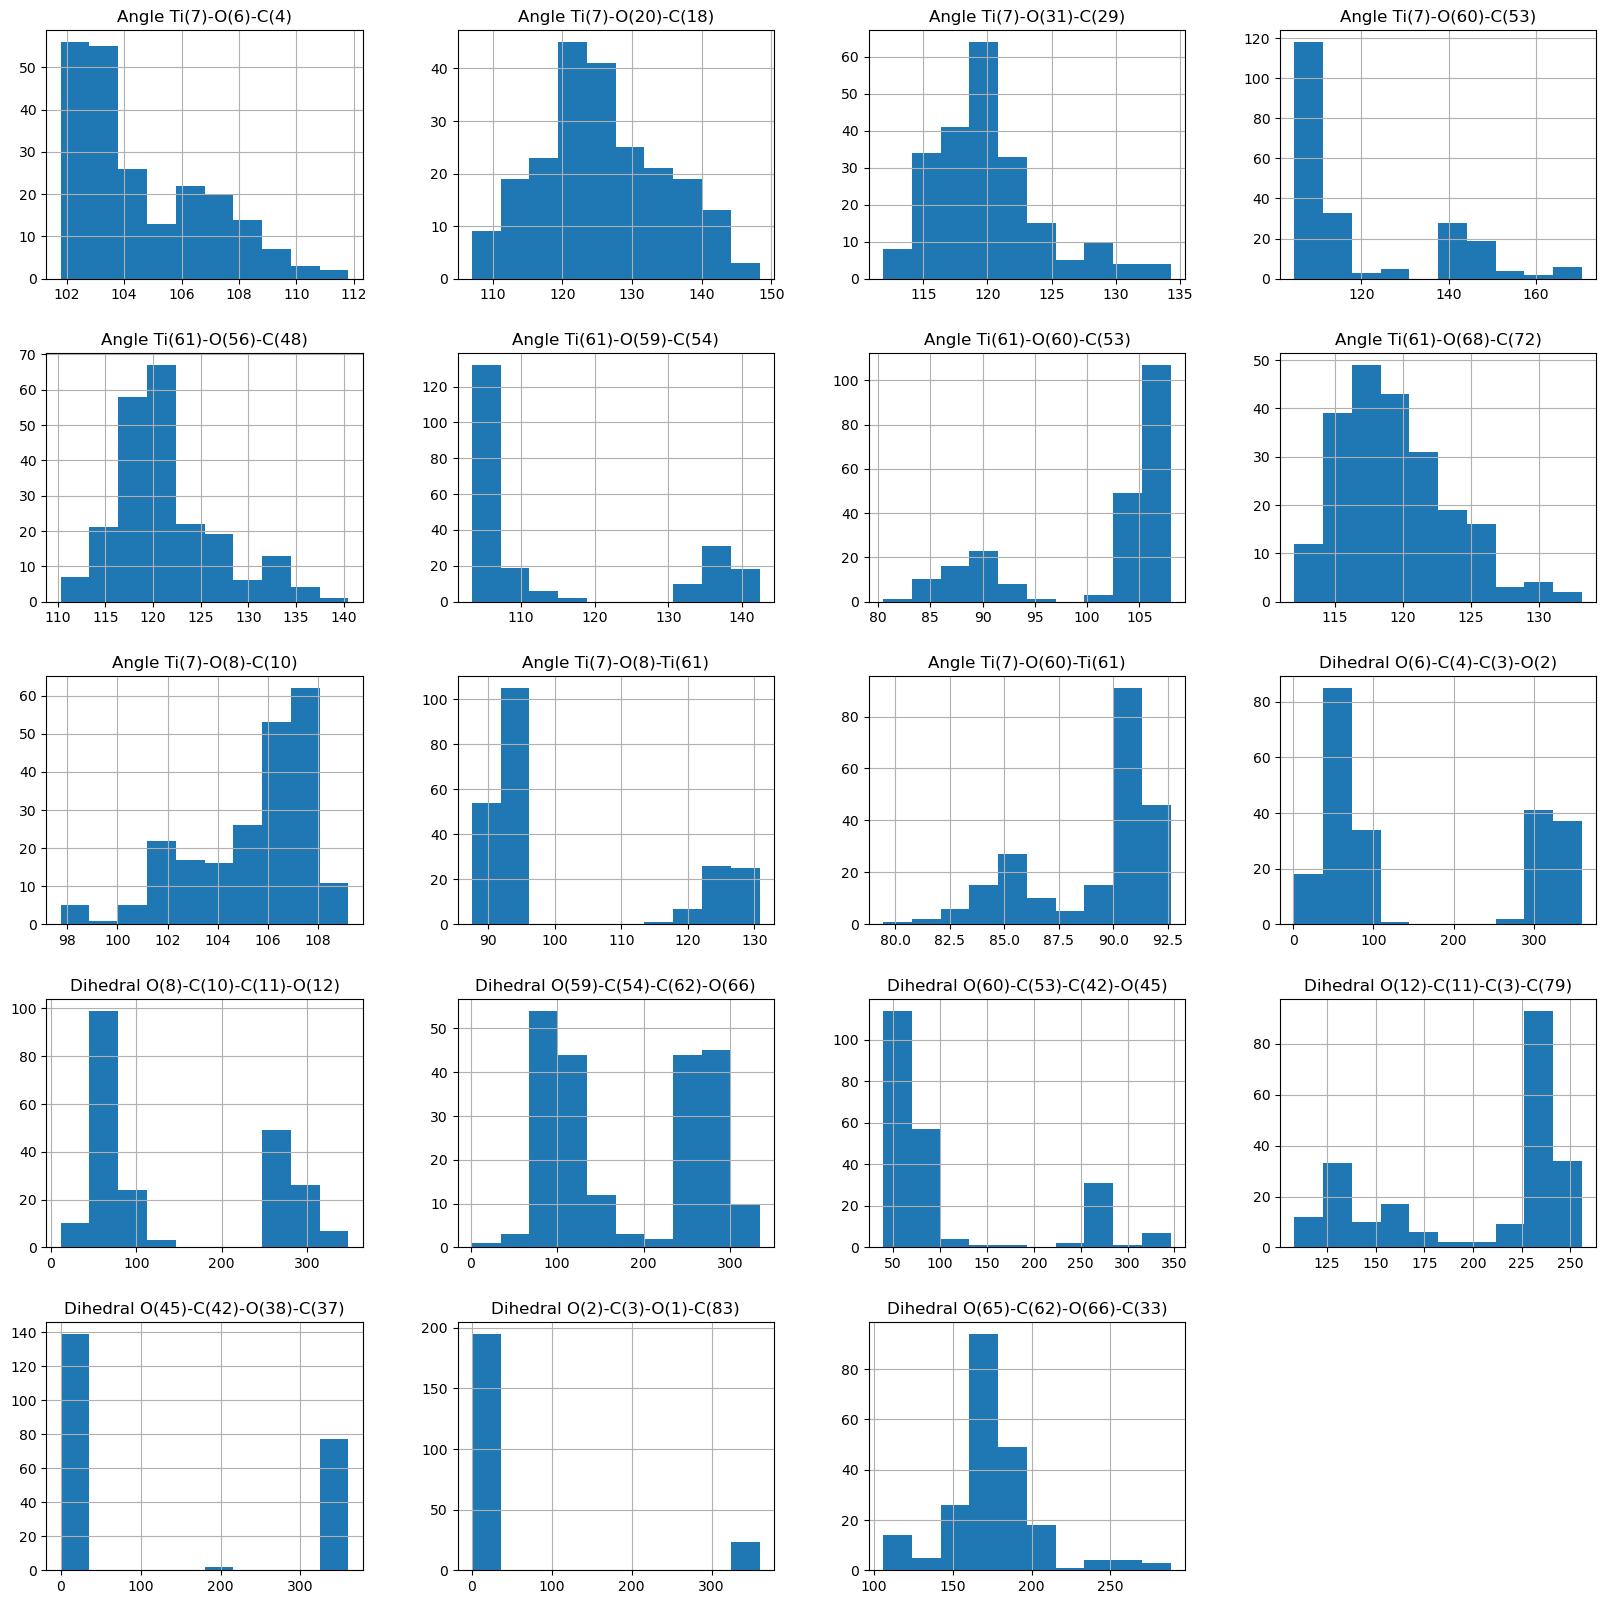

In [18]:
df_gfnff.hist(
    column=cols_to_plot,
    layout=(5, 4),
    figsize=(20, 20),
    bins=10,
    xlabelsize=10,
    )


array([[<AxesSubplot: title={'center': 'Angle Ti(7)-O(6)-C(4)'}>,
        <AxesSubplot: title={'center': 'Angle Ti(7)-O(20)-C(18)'}>,
        <AxesSubplot: title={'center': 'Angle Ti(7)-O(31)-C(29)'}>,
        <AxesSubplot: title={'center': 'Angle Ti(7)-O(60)-C(53)'}>],
       [<AxesSubplot: title={'center': 'Angle Ti(61)-O(56)-C(48)'}>,
        <AxesSubplot: title={'center': 'Angle Ti(61)-O(59)-C(54)'}>,
        <AxesSubplot: title={'center': 'Angle Ti(61)-O(60)-C(53)'}>,
        <AxesSubplot: title={'center': 'Angle Ti(61)-O(68)-C(72)'}>],
       [<AxesSubplot: title={'center': 'Angle Ti(7)-O(8)-C(10)'}>,
        <AxesSubplot: title={'center': 'Angle Ti(7)-O(8)-Ti(61)'}>,
        <AxesSubplot: title={'center': 'Angle Ti(7)-O(60)-Ti(61)'}>,
        <AxesSubplot: title={'center': 'Dihedral O(6)-C(4)-C(3)-O(2)'}>],
       [<AxesSubplot: title={'center': 'Dihedral O(8)-C(10)-C(11)-O(12)'}>,
        <AxesSubplot: title={'center': 'Dihedral O(59)-C(54)-C(62)-O(66)'}>,
        <AxesSubplot:

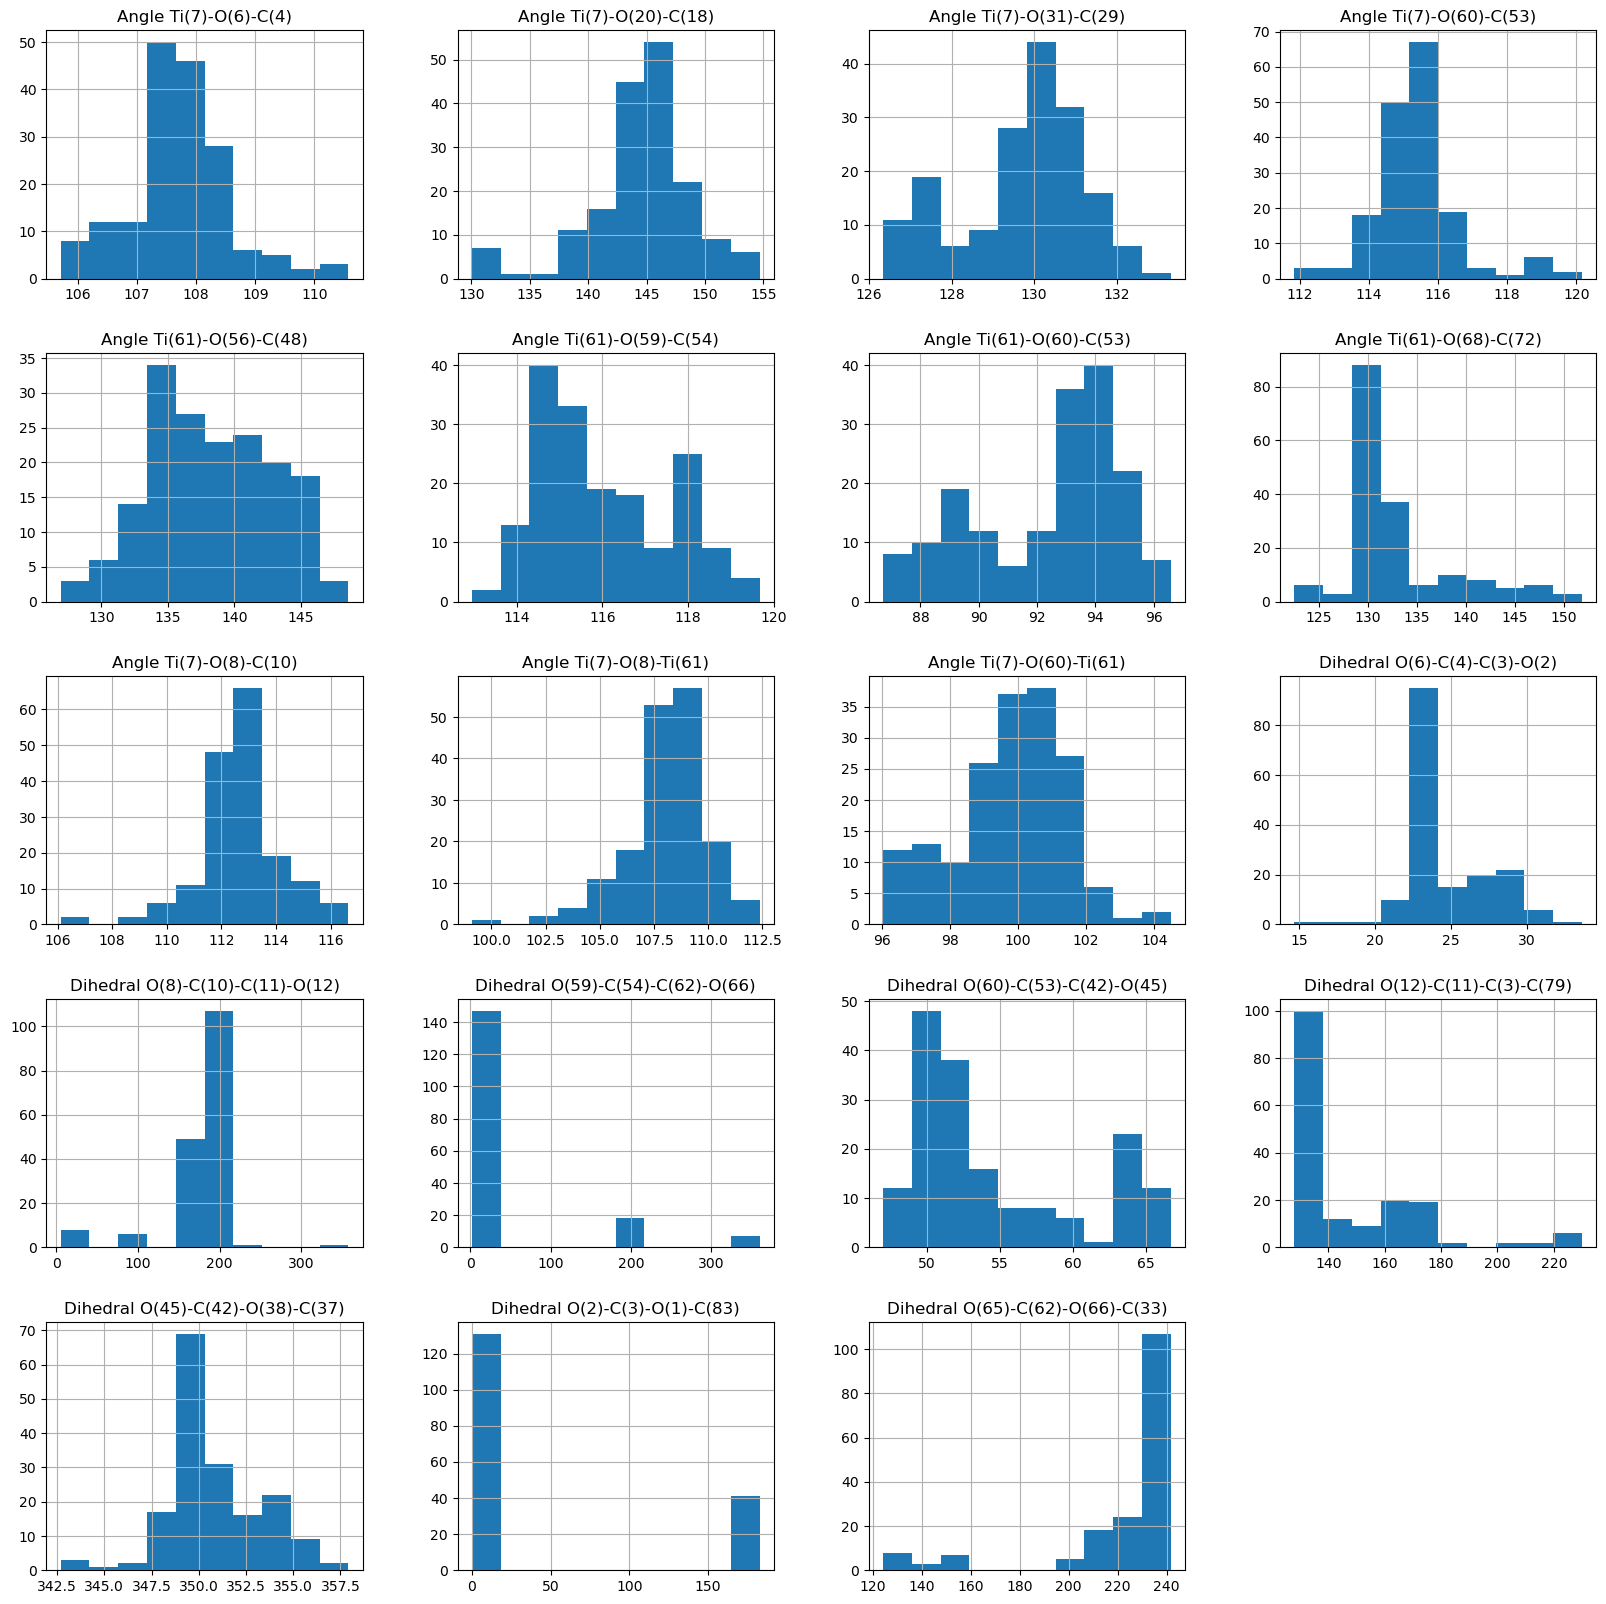

In [19]:
df_gfn2.hist(
    column=cols_to_plot,
    layout=(5, 4),
    figsize=(20, 20),
    bins=10,
    xlabelsize=10,
    )

In [61]:
def calculate_statistics(
        dfs_dict: Dict,
        columns: List[str]
        ) -> pd.DataFrame:

    res = pd.DataFrame()
    
    dft_names = []
    avgs = {col: [] for col in columns}
    mins = {col: [] for col in columns}
    maxs = {col: [] for col in columns}
    stdevs = {col: [] for col in columns}

    for df_key, df in dfs_dict.items():
        dft_names.append(df_key)
        for col in columns:
            avgs[col].append(round(df[col].mean(), 2))
            mins[col].append(round(df[col].min(), 2))
            maxs[col].append(round(df[col].max(), 2))
            stdevs[col].append(round(df[col].std(), 2))

    res["dft_name"] = dft_names
    for col in columns:
        res[f"{col} Mean"] = avgs[col]
        res[f"{col} Min"] = mins[col]
        res[f"{col} Max"] = maxs[col]
        res[f"{col} Stdev"] = stdevs[col]
    
    return res

In [62]:
dfs_dict = {
            **df_converged_dict,
            **{
                "GFN2": df_gfn2,
                "GFN-FF": df_gfnff,
                }
        }

statistics = calculate_statistics(
    dfs_dict=dfs_dict,
    columns=cols_to_plot
    )
    
statistics

,dft_name,Angle Ti(7)-O(6)-C(4) Mean,Angle Ti(7)-O(6)-C(4) Min,Angle Ti(7)-O(6)-C(4) Max,Angle Ti(7)-O(6)-C(4) Stdev,Angle Ti(7)-O(20)-C(18) Mean,Angle Ti(7)-O(20)-C(18) Min,Angle Ti(7)-O(20)-C(18) Max,Angle Ti(7)-O(20)-C(18) Stdev,Angle Ti(7)-O(31)-C(29) Mean,...,Dihedral O(45)-C(42)-O(38)-C(37) Max,Dihedral O(45)-C(42)-O(38)-C(37) Stdev,Dihedral O(2)-C(3)-O(1)-C(83) Mean,Dihedral O(2)-C(3)-O(1)-C(83) Min,Dihedral O(2)-C(3)-O(1)-C(83) Max,Dihedral O(2)-C(3)-O(1)-C(83) Stdev,Dihedral O(65)-C(62)-O(66)-C(33) Mean,Dihedral O(65)-C(62)-O(66)-C(33) Min,Dihedral O(65)-C(62)-O(66)-C(33) Max,Dihedral O(65)-C(62)-O(66)-C(33) Stdev
0,bp86_def2svpp_svpfit,115.45,113.16,123.15,3.07,154.81,145.09,159.62,5.28,147.49,...,359.91,66.36,56.85,0.29,359.82,103.65,198.11,129.91,244.97,51.34
1,pbe1pbe_def2svpp_svpfit,114.17,112.64,120.69,2.13,155.50,146.24,160.63,4.50,147.79,...,359.85,176.25,51.12,0.30,359.46,99.42,207.39,129.98,246.71,47.05
2,pbe1pbe_cc_pvtz_tzvpfit,113.66,111.93,121.50,2.80,156.10,146.88,160.58,4.96,150.89,...,181.69,57.23,38.44,1.43,183.39,75.81,184.59,129.42,243.26,55.00
3,GFN2,107.71,105.71,110.57,0.83,144.61,130.04,154.68,4.47,129.74,...,357.92,2.46,46.83,0.03,182.73,75.03,223.00,124.28,241.70,31.05
4,GFN-FF,104.63,101.79,111.81,2.29,125.71,107.03,148.31,8.93,119.98,...,359.87,169.48,41.56,0.04,359.86,109.22,174.58,105.80,288.41,29.25


In [59]:
statistics.transpose()[:10]

,0,1,2,3,4
dft_name,bp86_def2svpp_svpfit,pbe1pbe_def2svpp_svpfit,pbe1pbe_cc_pvtz_tzvpfit,GFN2,GFN-FF
Angle Ti(7)-O(6)-C(4) Mean,115.445036,114.167812,113.659064,107.712993,104.630226
Angle Ti(7)-O(6)-C(4) Min,113.163914,112.639122,111.930323,105.707911,101.790301
Angle Ti(7)-O(6)-C(4) Max,123.147496,120.688899,121.501644,110.573749,111.806609
Angle Ti(7)-O(6)-C(4) Stdev,3.06757,2.134234,2.800533,0.83022,2.287154
Angle Ti(7)-O(20)-C(18) Mean,154.807688,155.501158,156.096109,144.606665,125.705194
Angle Ti(7)-O(20)-C(18) Min,145.085875,146.23974,146.878412,130.04318,107.031918
Angle Ti(7)-O(20)-C(18) Max,159.619803,160.626128,160.579725,154.675186,148.314603
Angle Ti(7)-O(20)-C(18) Stdev,5.277716,4.503902,4.961919,4.468229,8.929091
Angle Ti(7)-O(31)-C(29) Mean,147.487447,147.792342,150.894743,129.737098,119.981436


In [22]:
def create_comparison_gfn2_gfnff(
        df_gfn2: pd.DataFrame,
        df_gfnff: pd.DataFrame,
        columns: List[str]
        ) -> Dict:

    res = {}

    for col in columns:
        df = pd.DataFrame()
        df["GFN-FF"] = df_gfnff[col]
        df["GFN2"] = df_gfn2[col]
        res[col] = df

    return res

def create_comparison(
        dfs_dict: pd.DataFrame,
        columns: List[str]
        ) -> Dict:

    res = {}

    for col in columns:
        df = pd.DataFrame()

        for name, df_source in dfs_dict.items():
            df[name] = df_source[col]

        res[col] = df

    return res


In [40]:
# dfs_dict_all = {
#                     **df_converged_dict,
#                     **{
#                         "GFN2": df_gfn2,
#                         "GFN-FF": df_gfnff,
#                         }
#                 }

dfs_dict_all = {
                    **{
#                        "bp86_def2svpp_svpfit": df_converged_dict["bp86_def2svpp_svpfit"]
                        "pbe1pbe_def2svpp_svpfit": df_converged_dict["pbe1pbe_def2svpp_svpfit"]
                        },
                    **{
                        "GFN2": df_gfn2,
                        "GFN-FF": df_gfnff,
                        }
                }


In [41]:
dfs_hist_comparison = create_comparison(
        dfs_dict=dfs_dict_all,
        columns=cols_to_plot
    )

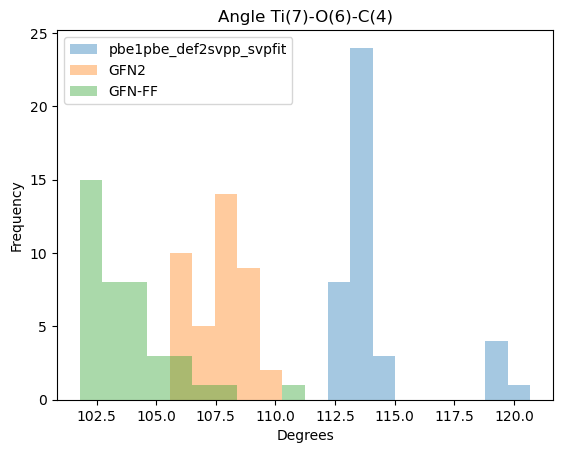

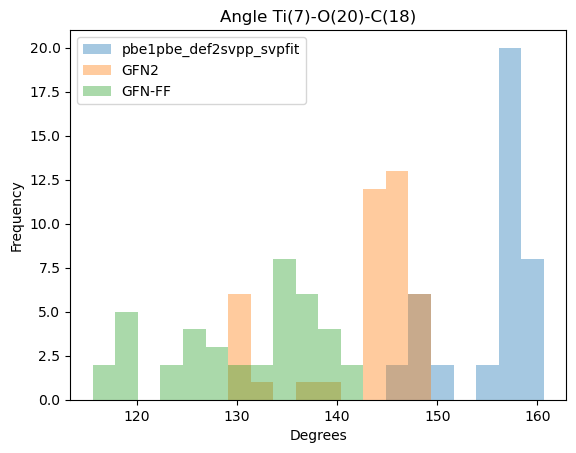

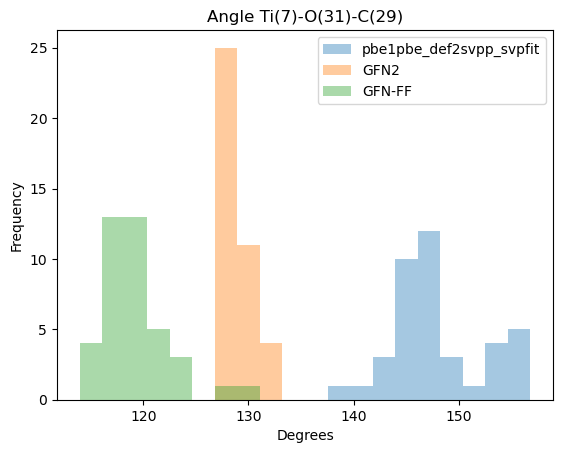

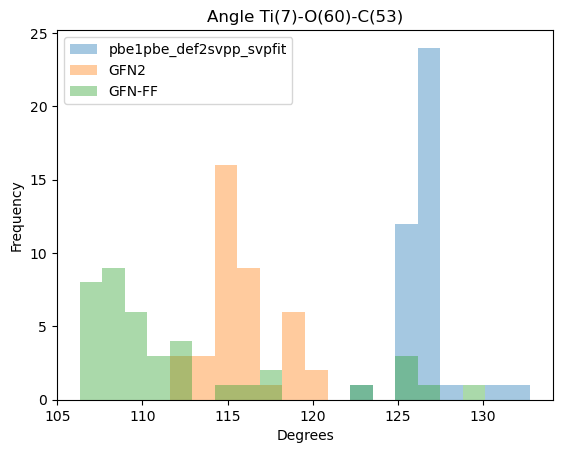

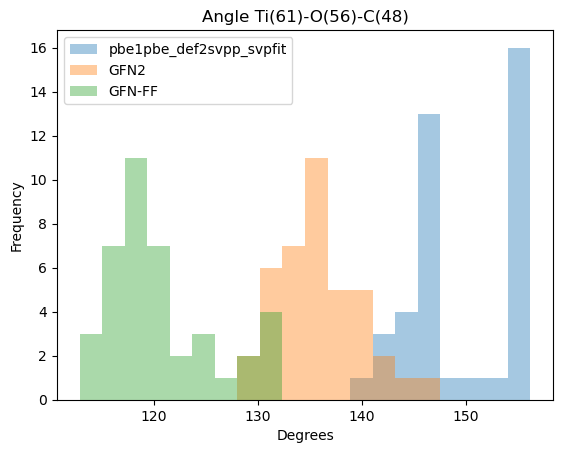

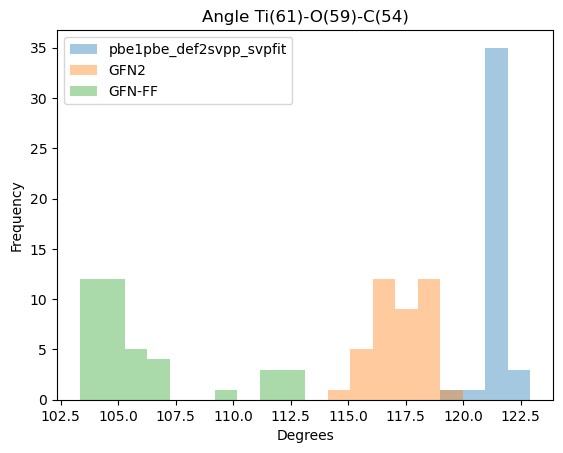

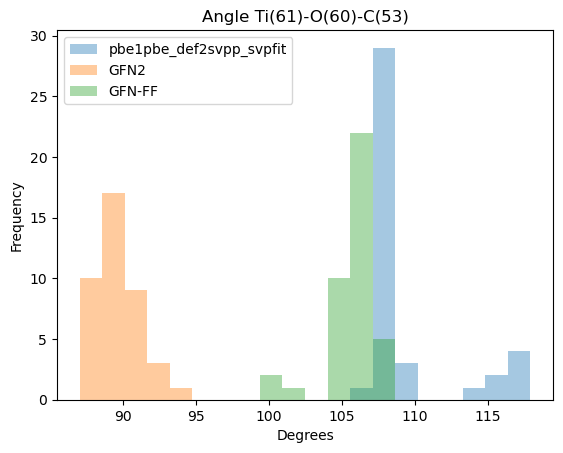

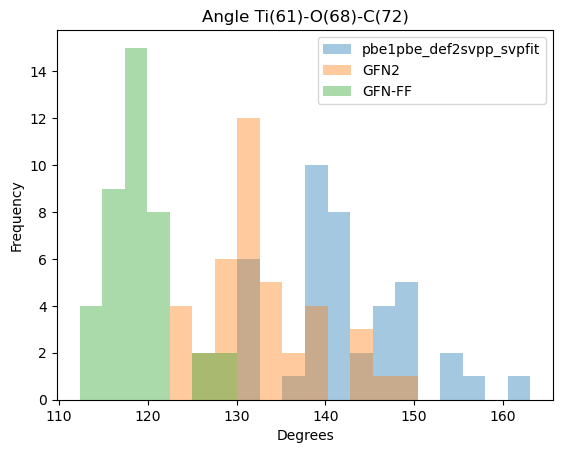

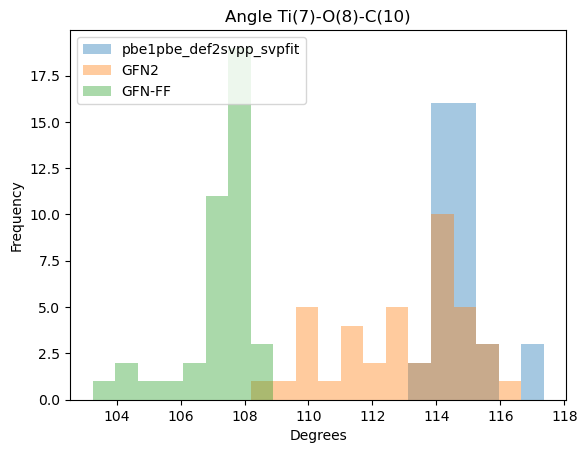

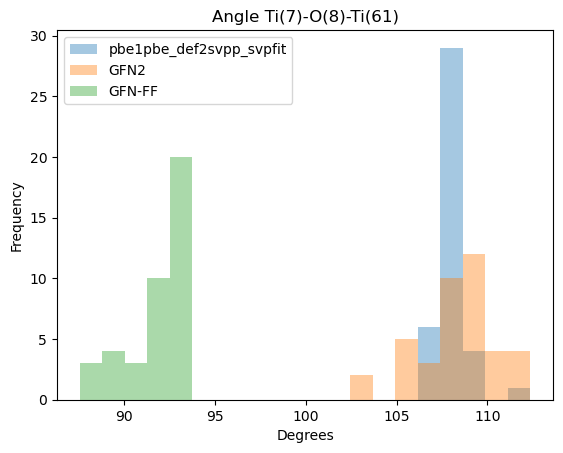

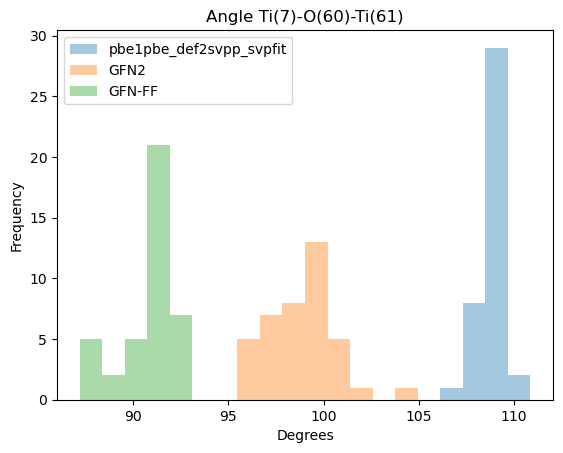

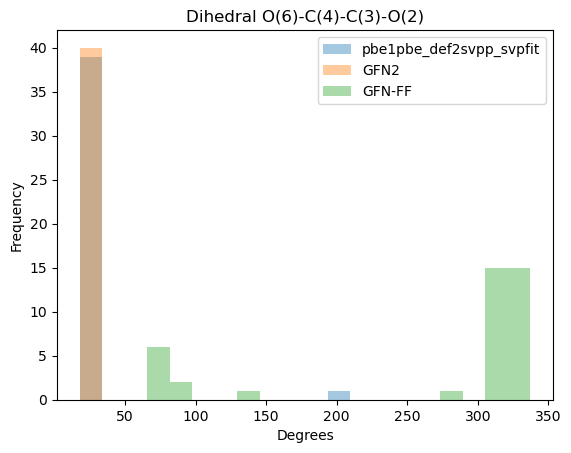

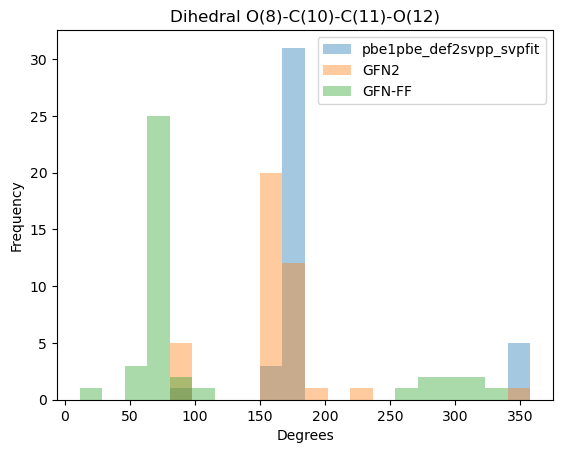

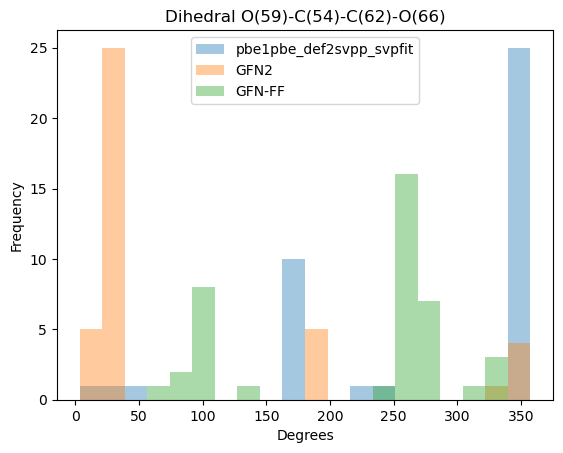

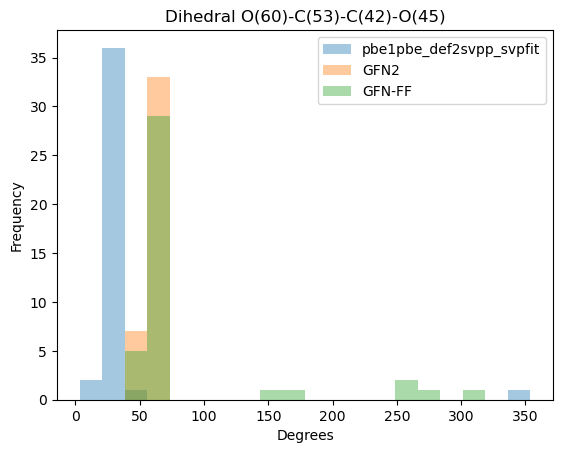

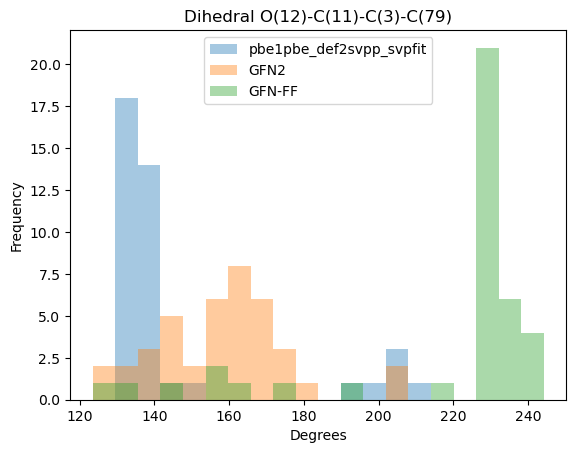

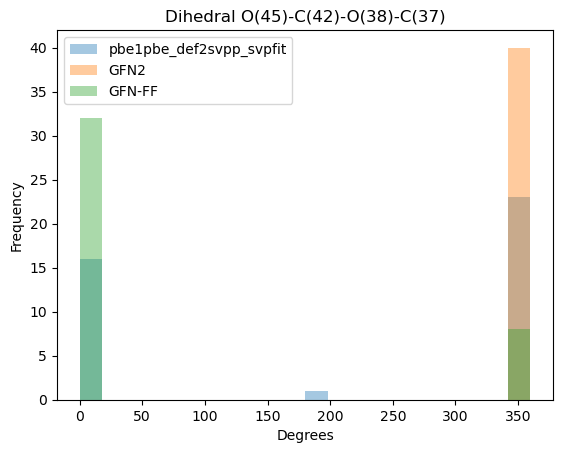

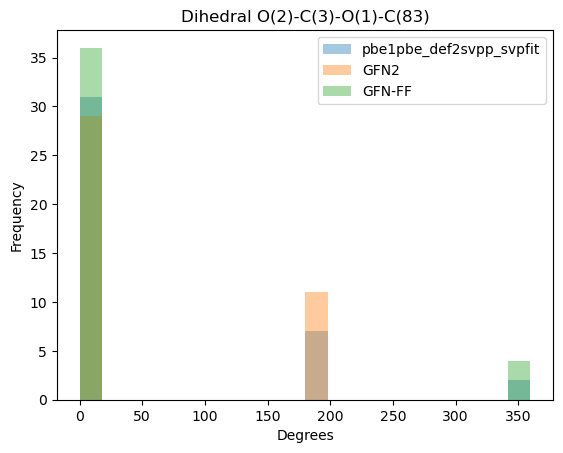

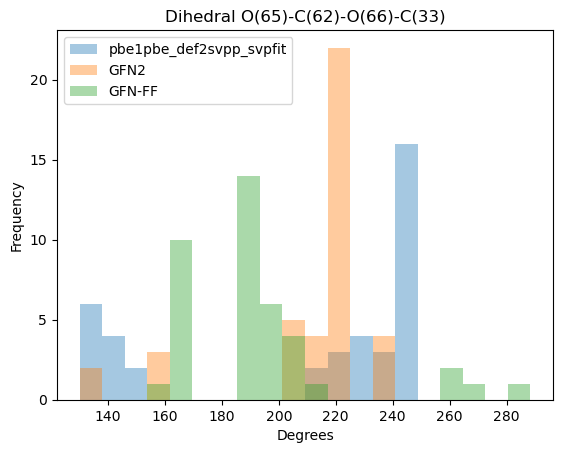

In [43]:
for features_name, df in dfs_hist_comparison.items():
    ax = df.plot.hist(
            bins=20,
            alpha=0.4,
            title=features_name,
            )

    ax.set_xlabel("Degrees")


In [35]:
#dfs_dict_all = df_converged_dict

dfs_dict_all = {
                    **{
                        "bp86_def2svpp_svpfit": df_converged_dict["bp86_def2svpp_svpfit"],
                        "pbe1pbe_def2svpp_svpfit": df_converged_dict["pbe1pbe_def2svpp_svpfit"]
                        },
                }

# DFT results: df_converged_dict
dfs_hist_comparison_dft = create_comparison(
        dfs_dict=dfs_dict_all,
        columns=cols_to_plot)


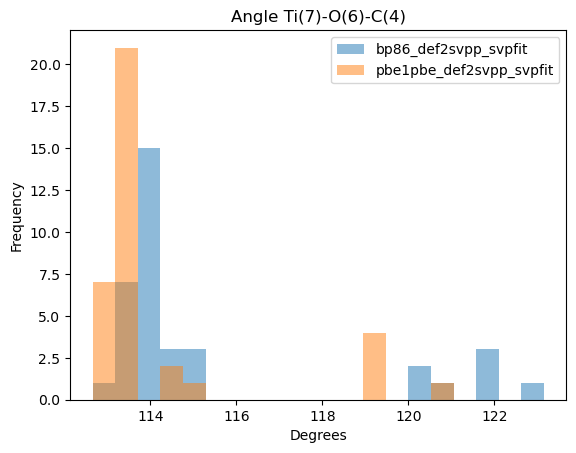

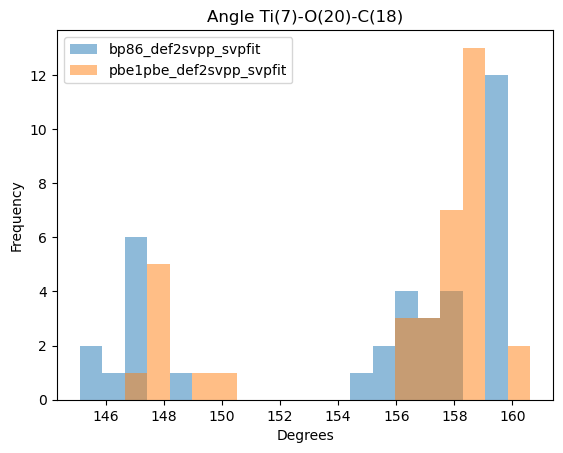

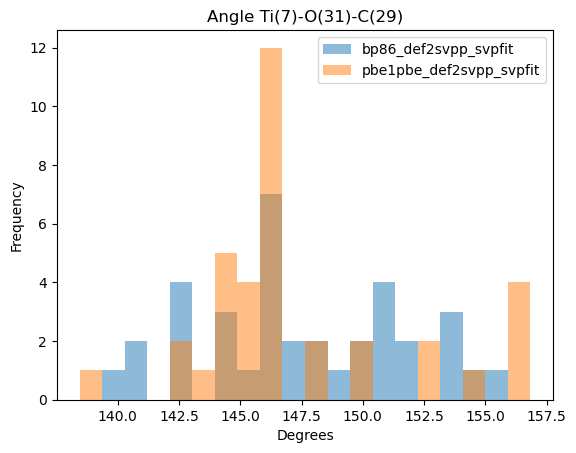

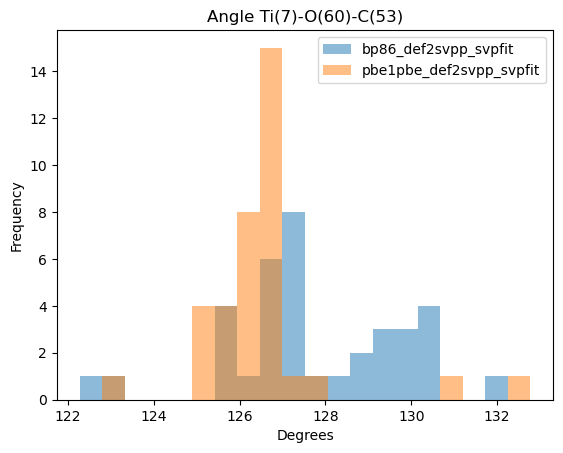

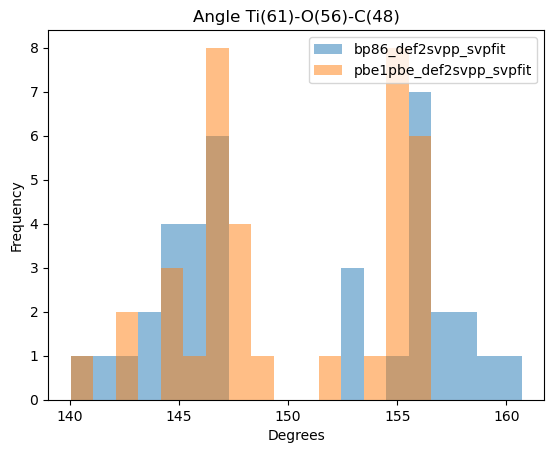

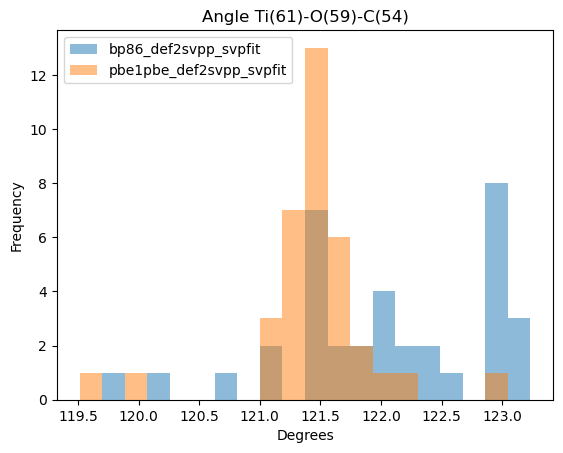

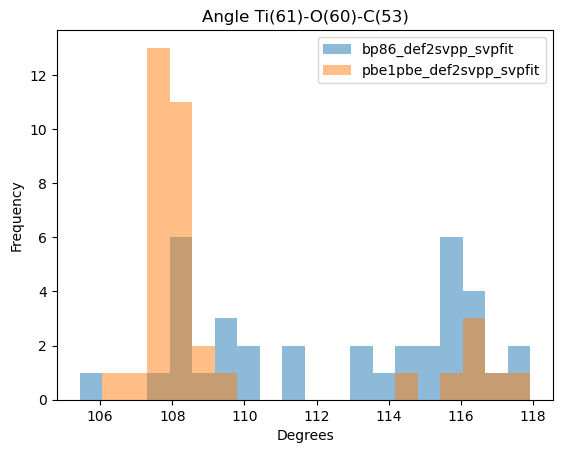

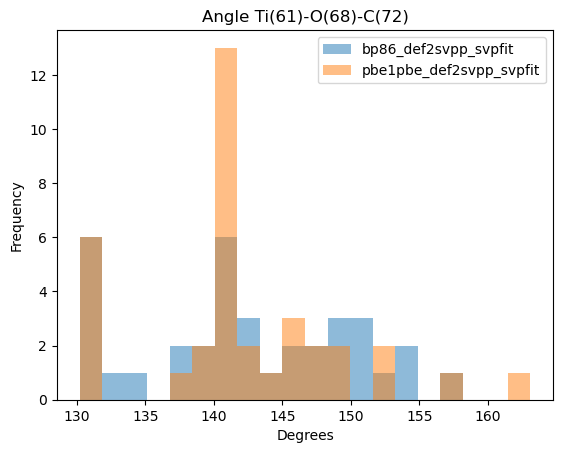

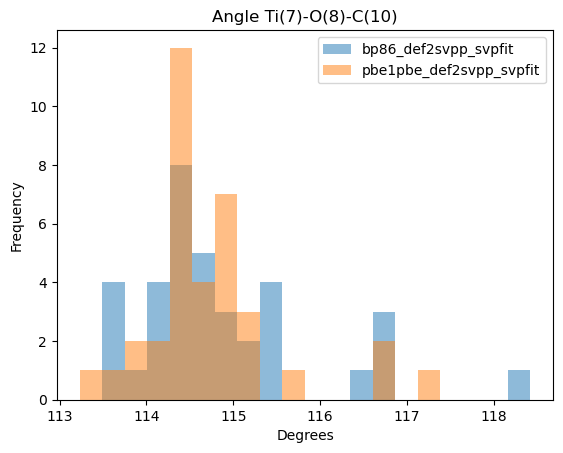

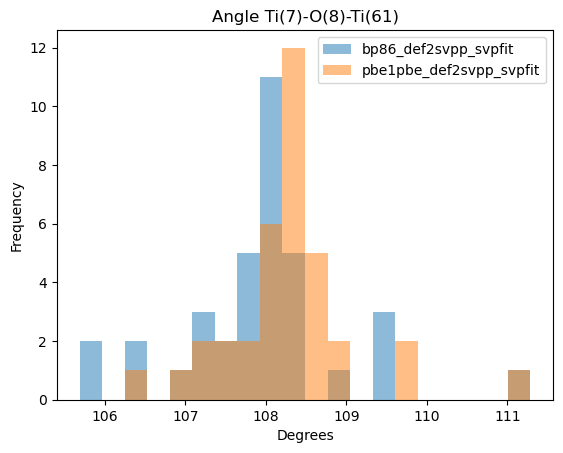

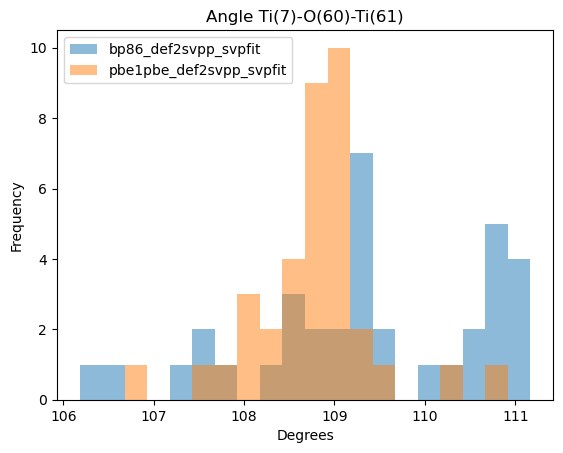

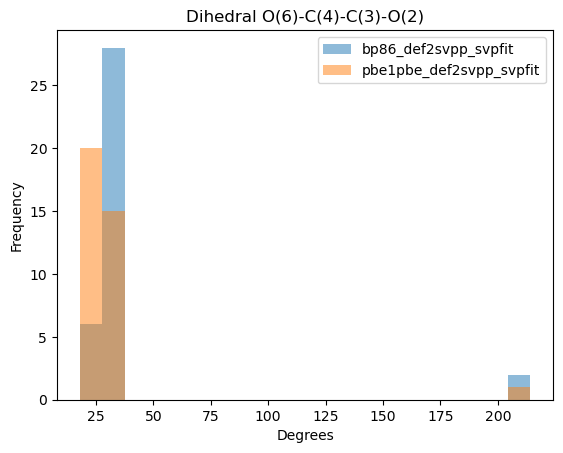

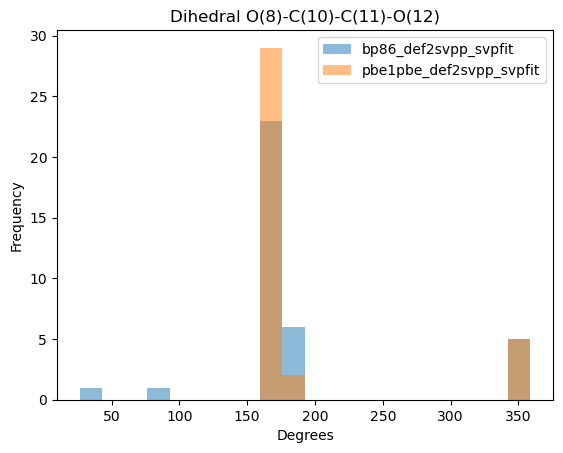

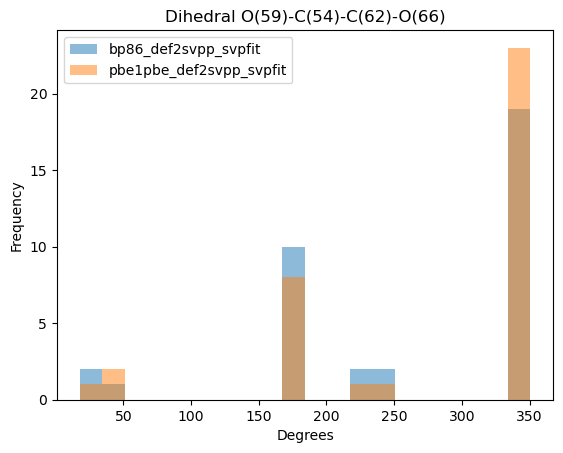

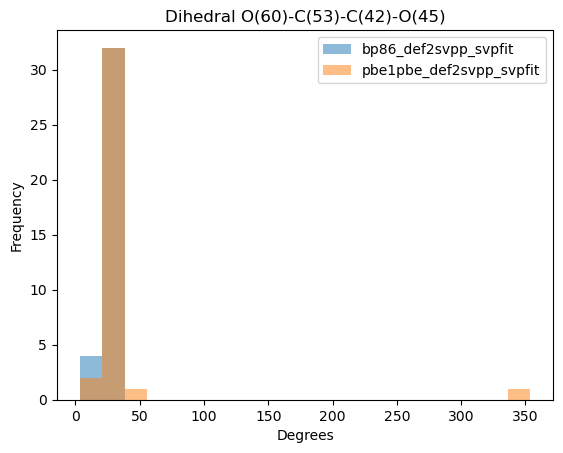

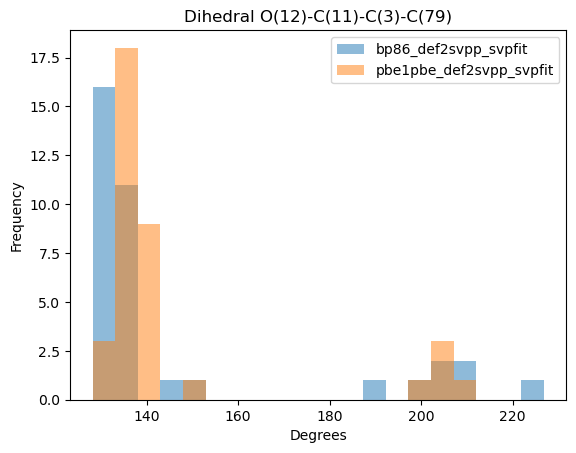

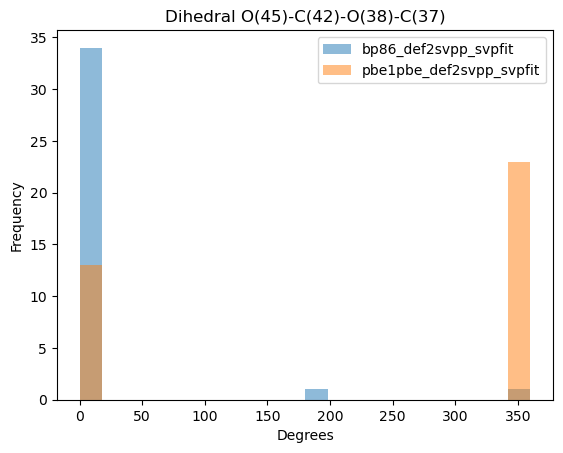

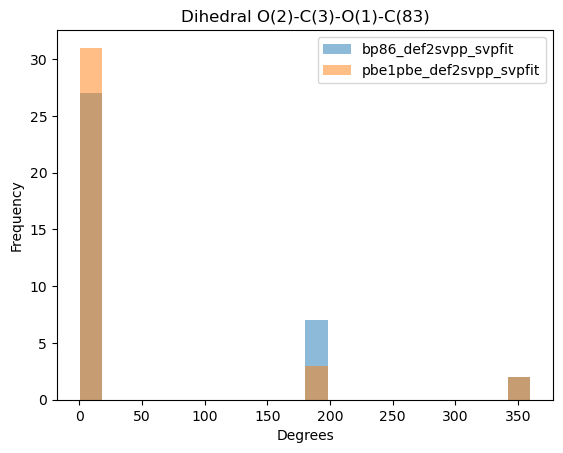

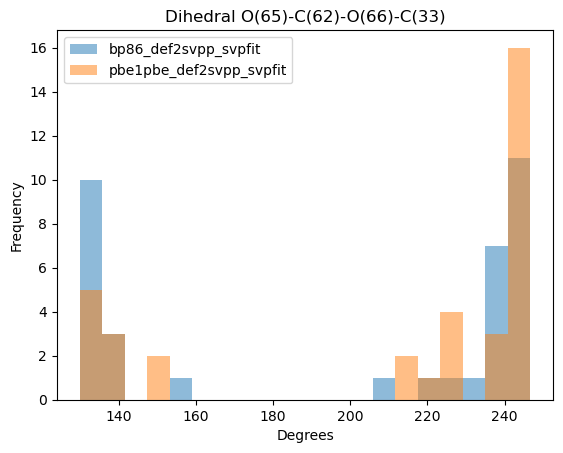

In [36]:
for features_name, df in dfs_hist_comparison_dft.items():
    ax = df.plot.hist(
            bins=20,
            alpha=0.5,
            title=features_name,
            )

    ax.set_xlabel("Degrees")


In [32]:
df = pd.DataFrame()
df["GFN-FF"] = df_gfnff[cols_to_plot[0]]
df["GFN2"] = df_gfn2[cols_to_plot[0]]


Text(0.5, 0, 'Degrees')

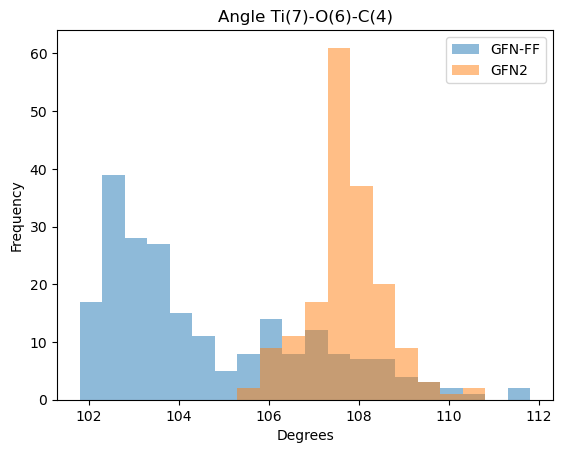

In [33]:
ax = df.plot.hist(
        bins=20,
        alpha=0.5,
        title=cols_to_plot[0],
        )

ax.set_xlabel("Degrees")
